In [5]:
# _*_ coding: utf-8 _*_
# @Time: 2021/12/09 16:05 
# @Author: yuyongsheng
# @Software: PyCharm
# @Description: 新华医院生脉注射液：1. 逐步向前 2. 建模

In [2]:
# 导入程序包
import pymysql as MySQLDB
import pandas as pd
import numpy as np

import re
import sys
import os
project_path = os.getcwd()

In [3]:
# 字符串转换为时间格式
import datetime
def str_to_datetime(x):
    try:
        a = datetime.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
        return a
    except:
        return np.NaN

# 数据清洗

In [4]:
df_model=pd.read_excel(project_path+'/data/2_df_processed_data.xlsx') # processed_data/df_9.5_人工删除没有意义的指标.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [5]:
# df_model.rename(columns={'TDM检测结果':'label'},inplace=True)

In [6]:
# 删除淋巴细胞为空数据
# df_model=df_model[df_model['淋巴细胞总数'].notnull()]

In [7]:
print(df_model.shape)

(184, 103)


## 删除无关特征

In [8]:
df_model=df_model.drop(['patient_id','case_no','drug_name','amount', 'drug_spec', 'dosage', 'frequency', 'start_datetime', 
                        'end_datetime', 'statusdesc','start_date', 'end_date', 'long_d_order', '分裂日期', '起始标签', '时间标签',
                        'adm_date', 'dis_date', '住院时长','肝功_before', '肝功_after', '皮疹_before', '皮疹_after', '恶心_before', 
                        '恶心_after', 'PLT_before', 'PLT_after', 'security_before', 'security_after', 'security_label', 
                        'tdm_date','efficiency_label'],axis=1)

KeyError: "['patient_id' 'case_no' 'drug_name' 'amount' 'drug_spec' 'dosage'\n 'frequency' 'start_datetime' 'end_datetime' 'statusdesc' 'start_date'\n 'end_date' 'long_d_order' '分裂日期' '起始标签' '时间标签' 'adm_date' 'dis_date'\n '住院时长' '肝功_before' '肝功_after' '皮疹_before' '皮疹_after' '恶心_before'\n '恶心_after' 'PLT_before' 'PLT_after' 'security_before' 'security_after'\n 'security_label' 'tdm_date' 'efficiency_label'] not found in axis"

In [9]:
df_model

,日剂量,gender,age,身高,体重,BMI,基础疾病,情感稳定剂,抗精神病药,抗焦虑药,...,葡萄糖,血浆D-二聚体测定,血浆凝血酶原时间测定,血浆纤维蛋白原测定,血清载脂蛋白E测定,载脂蛋白A,载脂蛋白B,载脂蛋白比值,酸碱浓度,高密度脂蛋白胆固醇
0,1.5,0,28,153,52.0,22.21,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0,25,162,52.0,19.81,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0,27,160,45.0,17.58,0,0,0,0,...,5.09,0.26,11.2,2.52,37.0,1.24,0.80,1.6,7.0,0.68
3,1.0,0,16,168,82.0,29.05,0,0,0,0,...,4.34,0.24,NaN,NaN,40.1,1.09,0.55,2.0,7.0,1.19
4,0.5,0,24,158,52.0,20.83,0,0,0,0,...,4.37,0.12,9.9,2.15,47.7,1.50,0.47,3.2,6.0,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1.0,0,16,159,47.0,18.59,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,0.5,1,30,167,79.0,28.33,0,0,0,0,...,5.02,0.49,11.5,3.11,37.2,1.36,1.09,1.2,6.0,1.32
181,1.0,0,17,163,57.0,21.45,0,0,1,0,...,4.38,0.12,11.1,2.34,37.2,0.97,1.19,0.8,7.5,1.03
182,1.0,1,14,166,49.0,17.78,0,0,1,1,...,5.40,0.55,NaN,NaN,38.5,1.08,0.68,1.6,NaN,1.11


In [10]:
df_model.shape

(184, 103)

In [11]:
# corr_result=df_model[['label','血小板_入院','血小板_出院前','血小板变化率','INR_入院','INR_出院前','INR变化率','总胆红素（TBil）_入院',
#           '总胆红素（TBil）_出院前','总胆红素（TBil）变化率','直接胆红素（DBil）_入院','直接胆红素（DBil）_出院前','直接胆红素（DBil）变化率',
#           '尿素氮（BUN）_入院','尿素氮（BUN）_出院前','尿素氮（BUN）变化率','尿蛋白（PRO）_入院','尿蛋白（PRO）_出院前','尿蛋白（PRO）变化率']].corr()

In [12]:
# corr_result[corr_result>0.5].to_excel(project_path+'/data/result/feature_engineering/corr.xlsx')

## 删除缺失超过50%的特征

### 删除列缺失超过50%的列

In [13]:
for i in df_model.columns:
    if df_model[i].isnull().sum()/df_model.shape[0] >= 0.5:
        print(i)
        del df_model[i]

催乳素
卵泡刺激素
可溶性转铁蛋白受体
孕酮
总铁结合力
睾酮
转铁蛋白
转铁蛋白饱和度
铁蛋白
雌二醇
黄体生成素
不饱和铁结合力
丙型肝炎病毒抗体[电化学发光]
丙氨酸氨基转移酶
乙型肝炎e抗体测定
乙型肝炎e抗原测定
乙型肝炎核心抗体测定
乙型肝炎表面抗体测定
乙型肝炎表面抗原测定
低密度脂蛋白胆固醇
促甲状腺素
凝血酶原时间比率
凝血酶原活动度
凝血酶时间测定
国际标准比率
小而密低密度脂蛋白胆固醇
尿比重(拆射计法)
心型肌酸激酶
总胆固醇
总钙
无机磷
极低密度脂蛋白胆固醇
梅毒螺旋体特异性抗体[电化学发光法]
氯离子
活化部分凝血活酶时间
游离T3
游离T4
甘油三酯
甲状三碘原氨酸
甲状腺素
白介素-6
肌酸激酶
胱抑素-C
脂蛋白a
葡萄糖
血浆D-二聚体测定
血浆凝血酶原时间测定
血浆纤维蛋白原测定
血清载脂蛋白E测定
载脂蛋白A
载脂蛋白B
载脂蛋白比值
酸碱浓度
高密度脂蛋白胆固醇


In [14]:
print(df_model.shape)  # (106,101)

(184, 49)


### 删除行缺失超过50%的行

In [15]:
df_model=df_model.reset_index(drop=True)
for i in range(df_model.shape[0]):
    if df_model.loc[i].isnull().sum()/df_model.loc[i].shape[0] >= 0.5:
        print(i)
        df_model.drop([i],axis=0,inplace=True)

1
6
7
16
17
18
37
38
43
46
47
48
50
51
52
58
65
66
67
68
70
71
72
76
80
81
83
89
94
96
97
98
100
101
102
104
106
108
109
110
111
112
113
115
116
117
118
119
120
122
124
125
126
129
135
140
141
143
144
147
150
152
154
156
158
162
165
166
167
168
170
174
175
179


In [16]:
# 删除缺失超过50%的特征
writer=pd.ExcelWriter(project_path+'/data/result/feature_engineering/df_1.3_删除缺失超过50%.xlsx')
df_model.to_excel(writer)
writer.save()

## 删除分类极不平衡的特征

In [17]:
# 保护目标变量、tdm数据
for i in df_model.columns[1:]:
    if df_model[i].nunique() < 2:
        del df_model[i]
        continue
    if df_model[i].nunique() == 2:
        # 如果分类变量中某一变量的占比超过90%，则删除该指标
        num_1 = df_model[i].value_counts()  # df一列中不同变量的数目
        num_2 = num_1.div(df_model.shape[0])  # div除法，所有元素都除以相同数值
        num_3 = num_2.max()  # 取出最大值
        if num_3 >= 0.9:
            print(i)
            del df_model[i]

基础疾病
情感稳定剂
安眠药


In [18]:
df_model.shape

(110, 46)

In [19]:
# 删除缺失超过50%的特征
writer=pd.ExcelWriter(project_path+'/data/result/feature_engineering/df_1.4_删除分类极不平衡.xlsx')
df_model.to_excel(writer)
writer.save()

## 过滤异常值

In [20]:
# 过滤异常值，大于正常值超过100倍！
for i in df_model.columns[2:]:
    # 测试特征是否存在异常值
    median_value= max(df_model[i].median(),1)
    max_value = df_model[i].max()
    if max_value > 100 * median_value:
        print(i)
    df_model[i]=df_model[i].apply(lambda x: np.nan if x<0 or x!=x else 100*median_value if float(x) > 100*median_value else x)

In [21]:
df_model.shape

(110, 46)

In [22]:
# 保存特征清洗
writer = pd.ExcelWriter(project_path + '/data/result/feature_engineering/df_1_特征清洗.xlsx')
df_model.to_excel(writer)
writer.save()

# 相关性分析

In [23]:
discrete_col=['gender','抗精神病药','抗焦虑药','行为干预治疗']
continuous_col=[x for x in df_model.columns if x not in discrete_col]
continuous_col.remove('日剂量')

## 分类变量相关性分析

In [24]:
from scipy.stats import kstest,shapiro
##检验是否正态
def norm_test(data):
    if len(data) > 30:
        norm, p = kstest(data, 'norm')
    else:
        norm, p = shapiro(data)
    #print(t,p)
    if p>=0.05:
        return True
    else:
        return False

In [25]:
import scipy.stats as st
# 连续变量的显著性检验
def test2(data_b, data_p):
    if norm_test(data_b) and norm_test(data_p):
        x = 1
        y = '独立样本T检验'
        t, p = st.ttest_ind(list(data_b),list(data_p), nan_policy='omit')
    else:
        x = 0
        y = 'Mann-Whitney U检验'
        t,p = st.mannwhitneyu(list(data_b),list(data_p))
    return x,y,t,p

In [26]:
def sig_test(df_high,df_low,list1):

    feature_list=[]  # 特征列表
    y_list=[]  # 显著性检验方法
    t_list=[]  # 统计量
    p_list=[]  # p值
    result_list=[]  # 是否显著
    high_mean_list=[]
    low_mean_list=[]

    for i in list1:
#         print(i)
        # 高剂量组统计
        df_high_nt=df_high[df_high['日剂量'].notnull()]
        data_high=df_high_nt['日剂量']
        high_mean=round(data_high.mean(),2)
#         df_high_nt=df_high[df_high[i].notnull()]
#         data_high=df_high_nt[i]
#         high_mean=round(data_high.mean(),2)
        # 低剂量组统计
        df_low_nt=df_low[df_low['日剂量'].notnull()]
        data_low=df_low_nt['日剂量']
        low_mean=round(data_low.mean(),2)
#         df_low_nt=df_low[df_low[i].notnull()]
#         data_low=df_low_nt[i]
#         low_mean=round(data_low.mean(),2)

        # 计算高低剂量组显著性差异
        if data_high.shape[0] >= 10 and data_low.shape[0]>=10:
            # 连续变量检验
            x,y,t,p = test2(data_high, data_low)
            t=round(t,2)
            p=round(p,3)
            if p <=0.05:
                sig='显著'
            else:
                sig='不显著'
            # 显著性 
            feature_list.append(i)
            y_list.append(y)
            t_list.append(t)
            p_list.append(p)
            result_list.append(sig)
            high_mean_list.append(high_mean)
            low_mean_list.append(low_mean)

    df_result=pd.DataFrame({'特征':feature_list,
                            '高剂量均值':high_mean_list,
                            '低剂量均值':low_mean_list,
                            '检验指标':y_list,
                            't值':t_list,
                            'p值':p_list,
                            '显著性结果':result_list})
    return df_result

In [27]:
discrete_col

['gender', '抗精神病药', '抗焦虑药', '行为干预治疗']

In [28]:
df_discrete_corr_sig=pd.DataFrame()
# 连续变量-分类变量
for i in discrete_col:
    print(i)
    df_MTX_high = df_model[df_model[i]==1]
    df_MTX_low = df_model[df_model[i]==0]
    # 甲氨蝶呤高低剂量组PSM控制变量统计和显著性检验
    df_sig_result = sig_test(df_MTX_high,df_MTX_low,[i])
    df_discrete_corr_sig=pd.concat([df_discrete_corr_sig,df_sig_result],axis=0)

gender
抗精神病药
抗焦虑药
行为干预治疗


In [29]:
df_discrete_corr_sig = df_discrete_corr_sig.reset_index(drop=True)

In [30]:
df_discrete_corr_sig

,特征,高剂量均值,低剂量均值,检验指标,t值,p值,显著性结果
0,gender,0.98,0.89,Mann-Whitney U检验,1362.5,0.142,不显著
1,抗精神病药,0.98,0.85,Mann-Whitney U检验,1018.5,0.009,显著
2,抗焦虑药,0.94,0.93,Mann-Whitney U检验,822.5,0.481,不显著
3,行为干预治疗,0.95,0.88,Mann-Whitney U检验,928.5,0.085,不显著


In [31]:
# 连续-分类变量相关性分析
writer=pd.ExcelWriter(project_path+'/data/result/feature_engineering/df_3.1_连续-分类变量相关性分析.xlsx')
df_discrete_corr_sig.to_excel(writer)
writer.save()

## 连续变量相关性分析

In [32]:
# 连续-连续pearson相关性分析
from scipy.stats import kstest,shapiro
##检验是否正态
def norm_test(data):
    if len(data) > 30:
        norm, p = kstest(data, 'norm')
    else:
        norm, p = shapiro(data)
    #print(t,p)
    if p>=0.05:
        return True
    else:
        return False

In [33]:
import scipy.stats as st
# 连续变量的显著性检验
def test2(data_b, data_p):
    if norm_test(data_b) and norm_test(data_p):
        x = 1
        y = 'pearson检验'
        t, p = st.pearsonr(list(data_b),list(data_p), nan_policy='omit')
    else:
        x = 0
        y = 'spearmanr检验'
        t,p = st.spearmanr(list(data_b),list(data_p))
    return x,y,t,p

In [34]:
def sig_test(df_high,df_low,list1):

    feature_list=[]  # 特征列表
    y_list=[]  # 显著性检验方法
    t_list=[]  # 统计量
    p_list=[]  # p值
    result_list=[]  # 是否显著
    high_mean_list=[]
    low_mean_list=[]

    for i in list1:
        print(i)
        # 高剂量组统计
        df_high['日剂量']=df_high['日剂量'].fillna(0)
        data_high=df_high['日剂量']
        high_mean=round(data_high.mean(),2)
#         df_high_nt=df_high[df_high[i].notnull()]
#         data_high=df_high_nt[i]
#         high_mean=round(data_high.mean(),2)
        
        df_low[i]=df_low[i].fillna(0)
        data_low=df_low[i]
        low_mean=round(data_low.mean(),2)

        # 计算高低剂量组显著性差异
        if data_high.shape[0] >= 10 and data_low.shape[0]>=10:
            # 连续变量检验
            x,y,t,p = test2(data_high, data_low)
            t=round(t,2)
            p=round(p,3)
            if p <=0.05:
                sig='显著'
            else:
                sig='不显著'
            # 显著性 
            feature_list.append(i)
            y_list.append(y)
            t_list.append(t)
            p_list.append(p)
            result_list.append(sig)
            high_mean_list.append(high_mean)
            low_mean_list.append(low_mean)

    df_result=pd.DataFrame({'特征':feature_list,
                            '高剂量均值':high_mean_list,
                            '低剂量均值':low_mean_list,
                            '检验指标':y_list,
                            't值':t_list,
                            'p值':p_list,
                            '显著性结果':result_list})
    return df_result

In [35]:
df_corr_target = df_model[['日剂量']]
df_corr_independent = df_model[continuous_col]

In [36]:
df_continuous_corr_sig = sig_test(df_corr_target,df_corr_independent,continuous_col)
df_continuous_corr_sig = df_continuous_corr_sig.reset_index(drop=True)

age
身高
体重
BMI
中性粒细胞总数
中性粒细胞百分数
单核细胞总数
单核细胞百分数
嗜碱性粒细胞总数
嗜碱性粒细胞百分数
嗜酸性粒细胞总数
嗜酸性粒细胞百分数
大型血小板比值
平均RBC血红蛋白浓度
平均红细胞体积
平均红细胞血红蛋白量
平均血小板容积
淋巴细胞总数
淋巴细胞百分数
白细胞计数
红细胞分布宽度-CV
红细胞分布宽度-SD
红细胞比积测定
红细胞计数
血小板分布宽度
血小板比积测定
血小板计数
血红蛋白测定
天门冬氨酸氨基转移酶
总胆红素
总蛋白
球蛋白
白/球比值
白蛋白
直接胆红素
转氨酶比值
间接胆红素
尿素
尿酸
总二氧化碳
肌酐


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
df_continuous_corr_sig

,特征,高剂量均值,低剂量均值,检验指标,t值,p值,显著性结果
0,age,0.93,26.78,spearmanr检验,0.25,0.007,显著
1,身高,0.93,165.62,spearmanr检验,-0.02,0.802,不显著
2,体重,0.93,56.29,spearmanr检验,0.05,0.640,不显著
3,BMI,0.93,20.44,spearmanr检验,0.08,0.405,不显著
4,中性粒细胞总数,0.93,2.93,spearmanr检验,0.09,0.367,不显著
5,中性粒细胞百分数,0.93,48.43,spearmanr检验,-0.02,0.806,不显著
6,单核细胞总数,0.93,0.45,spearmanr检验,-0.05,0.605,不显著
7,单核细胞百分数,0.93,6.96,spearmanr检验,-0.22,0.018,显著
8,嗜碱性粒细胞总数,0.93,0.04,spearmanr检验,-0.11,0.234,不显著
9,嗜碱性粒细胞百分数,0.93,0.62,spearmanr检验,-0.23,0.015,显著


In [38]:
# 保存高低剂量组PSM控制变量统计和显著性检验
writer=pd.ExcelWriter(project_path+r'/data/result/feature_engineering/df_2.2_连续-连续变量相关性分析.xlsx')
df_continuous_corr_sig.to_excel(writer)
writer.save()

In [39]:
continuous_relate = list(df_continuous_corr_sig[df_continuous_corr_sig['显著性结果']=='显著']['特征'])

In [40]:
continuous_relate

['age', '单核细胞百分数', '嗜碱性粒细胞百分数', '血小板分布宽度']

In [41]:
list(df_continuous_corr_sig[df_continuous_corr_sig['显著性结果']=='不显著']['特征'])

['身高',
 '体重',
 'BMI',
 '中性粒细胞总数',
 '中性粒细胞百分数',
 '单核细胞总数',
 '嗜碱性粒细胞总数',
 '嗜酸性粒细胞总数',
 '嗜酸性粒细胞百分数',
 '大型血小板比值',
 '平均RBC血红蛋白浓度',
 '平均红细胞体积',
 '平均红细胞血红蛋白量',
 '平均血小板容积',
 '淋巴细胞总数',
 '淋巴细胞百分数',
 '白细胞计数',
 '红细胞分布宽度-CV',
 '红细胞分布宽度-SD',
 '红细胞比积测定',
 '红细胞计数',
 '血小板比积测定',
 '血小板计数',
 '血红蛋白测定',
 '天门冬氨酸氨基转移酶',
 '总胆红素',
 '总蛋白',
 '球蛋白',
 '白/球比值',
 '白蛋白',
 '直接胆红素',
 '转氨酶比值',
 '间接胆红素',
 '尿素',
 '尿酸',
 '总二氧化碳',
 '肌酐']

In [187]:
# 业务角度需要保留：日剂量、age、MTX_tdm_24h、MTX_tdm_48h、MTX_tdm_72h
# continuous_relate.extend(['身高','体重','BMI','中性粒细胞总数','中性粒细胞百分数','单核细胞总数','嗜酸性粒细胞总数','嗜酸性粒细胞百分数',
#                         '平均RBC血红蛋白浓度','平均红细胞体积','平均红细胞血红蛋白量','平均血小板容积','淋巴细胞总数','淋巴细胞百分数',
#                          '白细胞计数','红细胞比积测定','红细胞计数','血小板比积测定','血小板计数','血红蛋白测定','总胆红素','总蛋白',
#                          '球蛋白','白/球比值','白蛋白','直接胆红素','转氨酶比值','间接胆红素','尿素','尿酸','肌酐'])

In [188]:
# 提取相关性特征
feature_relate=discrete_col + continuous_relate
# 加入目标变量
feature_relate.insert(0,'日剂量')
df_model_relate=df_model[feature_relate]

In [189]:
# 保存显著性分析结果
writer = pd.ExcelWriter(project_path + '/data/result/feature_engineering/df_2_显著性清洗.xlsx')
df_model_relate.to_excel(writer)
writer.save()

# 重要性评分

In [190]:
df_model_relate.shape

(270, 10)

In [191]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集，比例为8:2
x = df_model_relate.drop(['日剂量'],axis=1)
y = df_model_relate['日剂量']
tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=5)

In [192]:
# 重要性
import catboost,xgboost
model_boost=xgboost.XGBClassifier(max_depth=5,
                                learning_rate=0.01,
                                n_estimators=500,
                                min_child_weight=0.5,
                                eta=0.1,
                                gamma=0.5,
                                reg_lambda=10,
                                subsample=0.5,
                                colsample_bytree=0.8,
                                nthread=4,
                                scale_pos_weight=1)
model_boost.fit(tran_x,tran_y)
importance = model_boost.feature_importances_
print(tran_x.columns)
print(importance)

Index(['gender', '抗精神病药', '抗焦虑药', '行为干预治疗', 'age', '身高', '体重', 'BMI',
       'test_result'],
      dtype='object')
[0.09843543 0.09731633 0.084772   0.10805474 0.09071855 0.10290628
 0.11370058 0.11562548 0.18847057]


In [193]:
df_importance= pd.DataFrame(data={'特征':tran_x.columns,'重要性评分':importance})
df_importance['重要性评分']=df_importance['重要性评分'].apply(lambda x: round(x,3))
df_importance=df_importance.sort_values(['重要性评分'],ascending=False)
df_importance=df_importance.reset_index(drop=True)

In [194]:
df_importance.to_excel(project_path + '/data/result/feature_engineering/df_3_模型重要性评分.xlsx')

In [195]:
# 筛选重要特征组建建模数据
df_importance_select=df_importance[df_importance['重要性评分']>0]
select_list = list(df_importance_select['特征'])
select_list.insert(0,'日剂量')

In [196]:
df_model_importance = df_model_relate[select_list]

In [197]:
df_model_importance.shape

(270, 10)

In [198]:
# 保存重要性评分筛选后的建模数据
writer = pd.ExcelWriter(project_path + '/data/df_model_data_importance.xlsx')
df_model_importance.to_excel(writer)
writer.save()

# 逐步向前

In [47]:
# 读入数据
df_model=pd.read_excel(project_path + '/data/2_df_model_data_importance.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [48]:
# 抽取分类数据
df_model['日剂量']=df_model['日剂量'].apply(lambda x: 1 if round(float(x),1)==0.5 else
                                                    0 if round(float(x),1)==1 else 2)

In [49]:
df_model['日剂量'].value_counts()

0    135
1     29
2     20
Name: 日剂量, dtype: int64

In [50]:
# 提取分类数据
df_model['日剂量']=df_model['日剂量'].astype('str')
df_model=df_model[df_model['日剂量'].str.contains('0|1')]
df_model['日剂量']=df_model['日剂量'].astype('float')

## 插补数据

In [51]:
# 使用随机森林对缺失值进行插补
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def missing_value_interpolation(df):
    df = df.reset_index(drop=True)
    # 提取存在缺失值的列名
    missing_list = []
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            missing_list.append(i)
    missing_list_copy = missing_list.copy()
    # 用该列未缺失的值训练随机森林，然后用训练好的rf预测缺失值
    for i in range(len(missing_list)):
        name=missing_list[0]
        df_missing = df[missing_list_copy]
        # 将其他列的缺失值用0表示。
        missing_list.remove(name)
        for j in missing_list:
            df_missing[j]=df_missing[j].astype('str').apply(lambda x: 0 if x=='nan' else x)
        df_missing_is = df_missing[df_missing[name].isnull()]
        df_missing_not = df_missing[df_missing[name].notnull()]
        y = df_missing_not[name]
        x = df_missing_not.drop([name],axis=1)
        # 列出参数列表
        tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
        # 进行参数的搜索组合
        grid = GridSearchCV(RandomForestRegressor(),param_grid=tree_grid_parameter,cv=3)
        #rfr=RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
        #根据已有数据去拟合随机森林模型
        grid.fit(x, y)
        rfr = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'])
        rfr.fit(x, y)
        #预测缺失值
        predict = rfr.predict(df_missing_is.drop([name],axis=1))
        #填补缺失值
        df.loc[df[name].isnull(),name] = predict
    return df

In [52]:
# df_model_cb=missing_value_interpolation(df_model)
df_model_cb=df_model

In [53]:
df_model_cb.shape

(164, 46)

## 划分数据集和过采样

In [54]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']

tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

In [55]:
tran_x.shape

(131, 45)

In [56]:
tran_y.value_counts()

0.0    109
1.0     22
Name: 日剂量, dtype: int64

In [57]:
test_y.value_counts()

0.0    26
1.0     7
Name: 日剂量, dtype: int64

In [58]:
# 进行过采样
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [59]:
tran_x_sm.shape

NameError: name 'tran_x_sm' is not defined

## stepwise forward for classification

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import xgboost

f1_max_list=[]
feature_max_list=[]
for i in range(1,tran_x.shape[1]+1):
    # 津源xgboost模型
    sfs = SFS(xgboost.XGBClassifier(iterations=300, 
                                  learning_rate=0.2, 
                                  depth=6,
                                  loss_function='CrossEntropy',
                                  random_state=3),
              n_jobs=-1, # 并行使用的进程数，默认1个，如果设置为-1，该值为总的核数
              k_features=i,
             forward=True,
             floating=False,  
             verbose=2,  # 显示输出的一些参数，默认为0不输出
             scoring='roc_auc' , # 'roc_auc', #'r2', # for binary targets
             cv=3)  # cv交叉验证

    sfs = sfs.fit(tran_x.fillna(0), tran_y)
    # 选择特征
    selected_feat= tran_x.columns[list(sfs.k_feature_idx_)]
    f1_max=sfs.k_score_
    # 保存
    f1_max_list.append(f1_max)
    feature_max_list.append(selected_feat)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.7s finished

[2022-01-18 11:32:02] Features: 1/1 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18 11:32:04] Features: 1/2 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.8s finished

[2022-01-18 11:32:06] Features: 2/2 -- score: 0.8892017017017017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:32:59] Features: 3/8 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:33:01] Features: 4/8 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:33:03] Features: 5/8 -- score: 0.9409029565279564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished

[2022-01-18 11:33:05] Features: 6/8 -- score: 

[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.5s finished

[2022-01-18 11:33:58] Features: 9/11 -- score: 0.9463950557700557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished

[2022-01-18 11:34:00] Features: 10/11 -- score: 0.9463950557700557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished

[2022-01-18 11:34:01] Features: 11/11 -- score: 0.9450723044473044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18 11:34:03] Features: 1/12 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.6s finished

[2022-01-18 11:34:58] Features: 7/14 -- score: 0.9454029922779923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.6s finished

[2022-01-18 11:35:00] Features: 8/14 -- score: 0.9487098705848706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.5s finished

[2022-01-18 11:35:01] Features: 9/14 -- score: 0.9463950557700557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished

[2022-01-18 11:35:03] Features: 10/14 -- score: 0.9463950557700557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished

[2022-01-18 11:35:04] Features: 11/14 -- score: 0.9450723044473044[Parallel

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished

[2022-01-18 11:35:57] Features: 13/16 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2022-01-18 11:35:58] Features: 14/16 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished

[2022-01-18 11:35:59] Features: 15/16 -- score: 0.938838391963392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2022-01-18 11:36:01] Features: 16/16 -- score: 0.9389679858429858[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18

[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished

[2022-01-18 11:36:54] Features: 15/18 -- score: 0.938838391963392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2022-01-18 11:36:55] Features: 16/18 -- score: 0.9389679858429858[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.2s finished

[2022-01-18 11:36:57] Features: 17/18 -- score: 0.9260711604461606[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished

[2022-01-18 11:36:58] Features: 18/18 -- score: 0.9189971221221221[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 con

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.4s finished

[2022-01-18 11:37:49] Features: 12/20 -- score: 0.9425340519090519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished

[2022-01-18 11:37:51] Features: 13/20 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2022-01-18 11:37:52] Features: 14/20 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished

[2022-01-18 11:37:54] Features: 15/20 -- score: 0.938838391963392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2022-01-18 11:37:55] Features: 16/20 -- score: 0.9389679858429858[Parall

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:38:42] Features: 5/22 -- score: 0.9409029565279564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished

[2022-01-18 11:38:44] Features: 6/22 -- score: 0.9439863971113972[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.6s finished

[2022-01-18 11:38:46] Features: 7/22 -- score: 0.9454029922779923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.6s finished

[2022-01-18 11:38:47] Features: 8/22 -- score: 0.9487098705848706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished

[2022-01-18 11:39:36] Features: 18/23 -- score: 0.9189971221221221[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished

[2022-01-18 11:39:37] Features: 19/23 -- score: 0.9161505255255254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished

[2022-01-18 11:39:38] Features: 20/23 -- score: 0.9209454990704989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished

[2022-01-18 11:39:39] Features: 21/23 -- score: 0.9196584977834977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 co

[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:40:23] Features: 3/25 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:40:25] Features: 4/25 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:40:27] Features: 5/25 -- score: 0.9409029565279564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished

[2022-01-18 11:40:29] Features: 6/25 -- score: 0.9439863971113972[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.4s finished

[2022-01-18 11:41:16] Features: 12/26 -- score: 0.9425340519090519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished

[2022-01-18 11:41:17] Features: 13/26 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2022-01-18 11:41:19] Features: 14/26 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished

[2022-01-18 11:41:20] Features: 15/26 -- score: 0.938838391963392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2022-01-18 11:41:21] Features: 16/26 -- score: 0.9389679858429858[Parall

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished

[2022-01-18 11:42:03] Features: 19/27 -- score: 0.9161505255255254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished

[2022-01-18 11:42:04] Features: 20/27 -- score: 0.9209454990704989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished

[2022-01-18 11:42:05] Features: 21/27 -- score: 0.9196584977834977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.0s finished

[2022-01-18 11:42:06] Features: 22/27 -- score: 0.9175090268840269[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 co

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.9s finished

[2022-01-18 11:42:48] Features: 25/28 -- score: 0.9173548548548549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished

[2022-01-18 11:42:49] Features: 26/28 -- score: 0.9213231088231089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.8s finished

[2022-01-18 11:42:50] Features: 27/28 -- score: 0.9005143536393536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 ou

[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2022-01-18 11:43:31] Features: 29/29 -- score: 0.8934514872014873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18 11:43:33] Features: 1/30 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.8s finished

[2022-01-18 11:43:35] Features: 2/30 -- score: 0.8892017017017017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:43:37]

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.8s finished

[2022-01-18 11:44:16] Features: 2/31 -- score: 0.8892017017017017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:44:18] Features: 3/31 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:44:20] Features: 4/31 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:44:22] Features: 5/31 -- sco

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:45:00] Features: 3/32 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:45:02] Features: 4/32 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:45:04] Features: 5/32 -- score: 0.9409029565279564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished

[2022-01-18 11:45:06] Features: 6/32 -- sco

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:45:43] Features: 3/33 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:45:45] Features: 4/33 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:45:46] Features: 5/33 -- score: 0.9409029565279564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished

[2022-01-18 11:45:48] Features: 6/33 -- sco

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.8s finished

[2022-01-18 11:46:24] Features: 2/34 -- score: 0.8892017017017017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:46:26] Features: 3/34 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:46:28] Features: 4/34 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.7s finished

[2022-01-18 11:46:29] Features: 5/34 -- sco

[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished

[2022-01-18 11:47:04] Features: 34/34 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18 11:47:06] Features: 1/35 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.8s finished

[2022-01-18 11:47:08] Features: 2/35 -- score: 0.8892017017017017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:47:09]

[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.5s finished

[2022-01-18 11:47:46] Features: 32/35 -- score: 0.892034892034892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.5s finished

[2022-01-18 11:47:47] Features: 33/35 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished

[2022-01-18 11:47:47] Features: 34/35 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out

[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2022-01-18 11:48:28] Features: 29/36 -- score: 0.8934514872014873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2022-01-18 11:48:29] Features: 30/36 -- score: 0.8921287358787359[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished

[2022-01-18 11:48:30] Features: 31/36 -- score: 0.8899792649792649[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  14 ou

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.9s finished

[2022-01-18 11:49:10] Features: 25/37 -- score: 0.9173548548548549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished

[2022-01-18 11:49:11] Features: 26/37 -- score: 0.9213231088231089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.8s finished

[2022-01-18 11:49:12] Features: 27/37 -- score: 0.9005143536393536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 ou

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished

[2022-01-18 11:49:49] Features: 19/38 -- score: 0.9161505255255254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished

[2022-01-18 11:49:50] Features: 20/38 -- score: 0.9209454990704989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished

[2022-01-18 11:49:51] Features: 21/38 -- score: 0.9196584977834977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.0s finished

[2022-01-18 11:49:52] Features: 22/38 -- score: 0.9175090268840269[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 co

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished

[2022-01-18 11:50:22] Features: 10/39 -- score: 0.9463950557700557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished

[2022-01-18 11:50:23] Features: 11/39 -- score: 0.9450723044473044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.4s finished

[2022-01-18 11:50:25] Features: 12/39 -- score: 0.9425340519090519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished

[2022-01-18 11:50:26] Features: 13/39 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2022-01-18 11:50:28] Features: 14/39 -- score: 0.9415419884169886[Paral

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18 11:50:52] Features: 1/40 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.8s finished

[2022-01-18 11:50:54] Features: 2/40 -- score: 0.8892017017017017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:50:56] Features: 3/40 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.8s finished

[2022-01-18 11:50:57] Features: 4/40 -- sco

[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.5s finished

[2022-01-18 11:51:33] Features: 33/40 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished

[2022-01-18 11:51:33] Features: 34/40 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2022-01-18 11:51:34] Features: 35/40 -- score: 0.8948814886314885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 ou

[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.9s finished

[2022-01-18 11:52:12] Features: 24/41 -- score: 0.9160678535678534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.9s finished

[2022-01-18 11:52:13] Features: 25/41 -- score: 0.9173548548548549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished

[2022-01-18 11:52:14] Features: 26/41 -- score: 0.9213231088231089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 ou

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.4s finished

[2022-01-18 11:52:44] Features: 12/42 -- score: 0.9425340519090519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished

[2022-01-18 11:52:45] Features: 13/42 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2022-01-18 11:52:47] Features: 14/42 -- score: 0.9415419884169886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished

[2022-01-18 11:52:48] Features: 15/42 -- score: 0.938838391963392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished

[2022-01-18 11:52:49] Features: 16/42 -- score: 0.9389679858429858[Parall

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished

[2022-01-18 11:53:11] Features: 41/42 -- score: 0.8789615508365509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2022-01-18 11:53:11] Features: 42/42 -- score: 0.8715568246818247[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished

[2022-01-18 11:53:13] Features: 1/43 -- score: 0.8504285535535535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished

[2022-01-18 11:53:54] Features: 31/43 -- score: 0.8899792649792649[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.6s finished

[2022-01-18 11:53:55] Features: 32/43 -- score: 0.892034892034892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.5s finished

[2022-01-18 11:53:56] Features: 33/43 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.2s finished

[2022-01-18 11:54:31] Features: 19/44 -- score: 0.9161505255255254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished

[2022-01-18 11:54:32] Features: 20/44 -- score: 0.9209454990704989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished

[2022-01-18 11:54:33] Features: 21/44 -- score: 0.9196584977834977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.0s finished

[2022-01-18 11:54:34] Features: 22/44 -- score: 0.9175090268840269[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 co

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.8s finished

[2022-01-18 11:54:54] Features: 3/45 -- score: 0.90746996996997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.9s finished

[2022-01-18 11:54:56] Features: 4/45 -- score: 0.9346556377806378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.8s finished

[2022-01-18 11:54:57] Features: 5/45 -- score: 0.9409029565279564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.8s finished

[2022-01-18 11:54:59] Features: 6/45 -- sco


[2022-01-18 11:55:32] Features: 34/45 -- score: 0.8918695481195481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2022-01-18 11:55:33] Features: 35/45 -- score: 0.8948814886314885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished

[2022-01-18 11:55:34] Features: 36/45 -- score: 0.8861316673816674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: D

In [63]:
df_forward_result=pd.DataFrame(data={'auc':f1_max_list,
                                    'feature_names':feature_max_list})
# 保存模型测试和测试结果到本地文件
df_forward_result.to_excel(project_path + '/data/result/feature_engineering/df_4_逐步向前特征测试结果.xlsx')

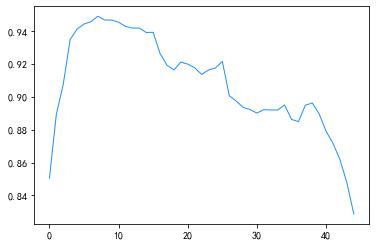

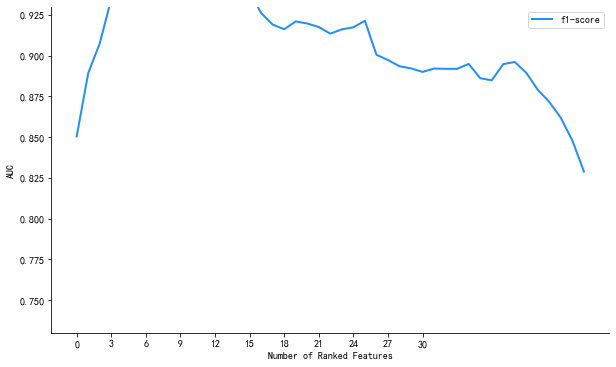

In [82]:
import matplotlib.pyplot as plt

plt.plot(f1_max_list,color='dodgerblue', linewidth=1 ,label='AUC')
# pd.DataFrame(f1_max_list).to_excel('AUC_four.xlsx')
f2 = pd.DataFrame(f1_max_list)
#作图
fig = plt.figure(figsize=(10, 6), facecolor='white')  #创建figure对象
ax = fig.add_subplot(1, 1, 1)  #获得Axes对象
ax.plot( f2[0], '-',color='dodgerblue', linewidth=2 ,label='f1-score')  
ax.set_xlabel('Number of Ranked Features')  #设置x轴标签
ax.set_ylabel('AUC')  #设置y轴标签
plt.ylim(0.73, 0.93)
plt.xticks(range(0,31,3))  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend() 
plt.show()

## stepwise forward for regression

## 逐步向前画图

In [68]:
df_forward_result =pd.read_excel(project_path +'/data/result/feature_engineering/df_4_逐步向前特征测试结果.xlsx')
if 'Unnamed: 0' in df_forward_result.columns:
    df_forward_result = df_forward_result.drop(['Unnamed: 0'], axis=1)
    
f1_max_list=list(df_forward_result['auc'])
feature_max_list=list(df_forward_result['feature_names'])

In [69]:
df_forward_result.head()

,auc,feature_names
0,0.850429,"Index(['test_result'], dtype='object')"
1,0.889202,"Index(['test_result', '抗精神病药'], dtype='object')"
2,0.907470,"Index(['test_result', '抗精神病药', '间接胆红素'], dtype..."
3,0.934656,"Index(['test_result', '血小板分布宽度', '抗精神病药', '间接胆..."
4,0.940903,"Index(['test_result', '血小板计数', '血小板分布宽度', '抗精神..."


Text(0, 0.5, 'AUC')

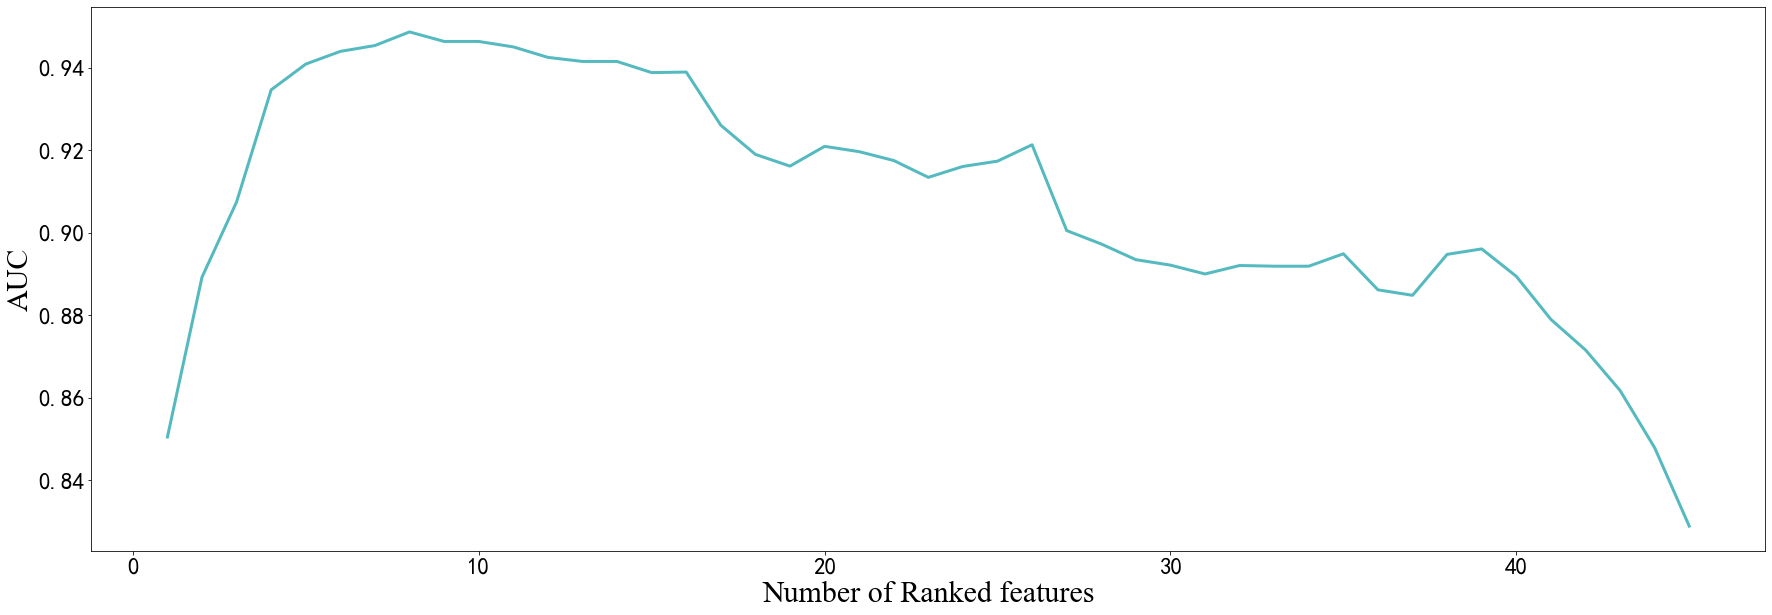

In [70]:
# 画图
# 如果模型画图不好，可以选择在excel中画图
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
rc('mathtext', default='regular')

# r2折线图
# 分辨率参数-dpi，画布大小参数-figsize
plt.figure(figsize=(30,10))
plt.plot(list(range(1,len(f1_max_list)+1)),f1_max_list,
         color=(0.32941176470588235, 0.7294117647058823, 0.7490196078431373), label='AUC',linewidth=3) # 线粗细
# 设置坐标刻度值的大小
plt.tick_params(labelsize=23)

# 设置横纵坐标的名称以及对应字体格式
font_x = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 30,
         }
plt.xlabel('Number of Ranked features',font_x)
plt.ylabel('AUC',font_x)

# 展示横坐标
# x_list=list(df_feature['特征'])
plt.xticks(list(range(len(f1_list))),f1_list,rotation=285)
# plt.legend(bbox_to_anchor=(1.1,1))  # 显示图例

## 保存逐步向前筛选的建模数据

In [71]:
f1_max_index=f1_max_list.index(max(f1_max_list))
print(f1_max_index)
feature_com_best=df_forward_result.loc[f1_max_index,'feature_names']
print(feature_com_best)

7
Index(['test_result', '血小板计数', '大型血小板比值', '血小板分布宽度', '红细胞计数', '血红蛋白测定',
       '抗精神病药', '间接胆红素'],
      dtype='object')


In [72]:
feature_com_best

"Index(['test_result', '血小板计数', '大型血小板比值', '血小板分布宽度', '红细胞计数', '血红蛋白测定',\n       '抗精神病药', '间接胆红素'],\n      dtype='object')"

In [73]:
str(feature_com_best).split('\'')

['Index([',
 'test_result',
 ', ',
 '血小板计数',
 ', ',
 '大型血小板比值',
 ', ',
 '血小板分布宽度',
 ', ',
 '红细胞计数',
 ', ',
 '血红蛋白测定',
 ',\n       ',
 '抗精神病药',
 ', ',
 '间接胆红素',
 '],\n      dtype=',
 'object',
 ')']

In [77]:
feature_list=str(feature_com_best).split('\'')
feature_forward_select=feature_list[1:2*(f1_max_index+1):2]
# feature_forward_select=['单核细胞绝对值','异甘草酸镁','甘草酸苷','托烷司琼','谷胱甘肽','红细胞','嗜酸性细胞百分比','多烯磷脂酰',
#                         '嗜碱性细胞百分比','gender','RBC平均容量','MTX_tdm_72h','白蛋白(干式)','中性细胞百分比','MTX_tdm_48h',
#                         '长春新碱','RBC血红浓度']
feature_forward_select.insert(0,'日剂量')

In [78]:
feature_forward_select

['日剂量',
 'test_result',
 '血小板计数',
 '大型血小板比值',
 '血小板分布宽度',
 '红细胞计数',
 '血红蛋白测定',
 '抗精神病药',
 '间接胆红素']

In [79]:
df_model_forward=df_model[feature_forward_select]
df_model_forward.to_excel(project_path+'/data/df_model_data_forward.xlsx')